In [55]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from collections import defaultdict
from scipy.stats import norm
import pickle

import my_graph_helpers as mgh
import my_graph as mg

In [67]:
reload(mgh)
reload(mg)

<module 'my_graph' from 'my_graph.py'>

In [46]:
def new_length(block,a,r,plot=False):
    myG = block.copy()    
    myG.define_roads()
    myG.define_interior_parcels()
    
    new_roads, bisect = mgh.build_all_roads(myG, barriers=False, alpha=a, vquiet=True)
    if plot:
        myG.plot_roads(master=block, new_road_width = 4, old_node_size=25, old_road_width = 6, barriers = False)
        plt.savefig('Figs/{0}_a{1}_r{2}.pdf'.format(myG.name,str(a),str(r)), format='pdf')
    plt.close('all')
    return new_roads


In [47]:
def nice_histogram(a,x,bounds=None):
    num_bins = 80
    if bounds is None:
        bounds=[x.min(),x.max()]
        
        
    textstr = ' alpha = {0} \n n={1} \n mu={2:.2f} \n sigma={3:.2f}'.format(a,len(x), x.mean(), x.std())
    # the histogram of the data
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    n, bins, patches = plt.hist(x, num_bins, range=bounds, normed=1, cumulative=True,
                                facecolor='grey', alpha=0.5)
    # add a 'best fit' line
    y = norm(x.mean(), x.std()).cdf(bins)
    plt.plot(bins, y, 'r--')
    plt.xlabel('Length of new roads')
    plt.ylabel('Probability')
    plt.title(r'$\alpha = {0}$'.format(a))
    plt.text(0.05, .8,textstr, transform=ax.transAxes)
    plt.savefig("histogram_alpha_"+str(a)+".pdf", format='pdf', pad_inches=0.5)

In [48]:
def nice_histogram_many(d):
    num_bins = 80
    fig = plt.figure()
    for a in d.keys():
        n, bins, patches = plt.hist(d[a], num_bins, normed=1, cumulative=True,histtype = 'step' , label = "a = {}".format(a), alpha=0.5)
        plt.legend(loc='lower right')

In [69]:
### Import data
filename = "data/CapeTown"
place = "cape"
erezero = np.array([305680, 8022350])
crezero= np.array([-31900, -3766370])
original = mgh.import_and_setup(1, filename, rezero=crezero, threshold=1,
                                connected=True, name=place+"_S0")

data loaded


In [70]:
# component = 45 is current example block
component = 0

block = original.copy()
block.define_roads()
block.define_interior_parcels()

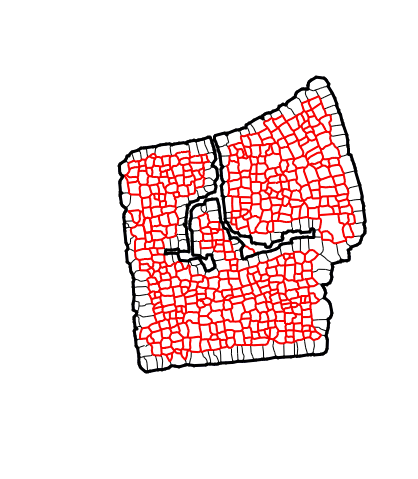

In [71]:
myG = block.copy()    
myG.define_roads()
myG.define_interior_parcels()

fig = plt.figure(figsize=(8,8))
myG.plot_roads(master=block, new_road_width = 2, old_node_size=4, old_road_width = 3, new_plot=False)

plt.savefig("Figs/cape_block.pdf", format='pdf',)


In [73]:
new_roads, bisect = mgh.build_all_roads(myG, barriers=False, alpha=a, vquiet=True)

NetworkXNoPath: node (95.47,88.04) not reachable from (305620.00,8022470.00)

In [72]:
alpha = [0.5, 1, 2, 4, 16]
d=defaultdict(list)
d
for a in alpha:
    r = 0
    print "alpha = {}".format(a)
    for r in range(0,10):
        nr = new_length(block,a,r, plot=True)
        d[a].append(nr)
        if r in [0,50,100,150]:
            print "r={}, alpha={}".format(r,a)
            
        r=+1
        pickle.dump(d, open( "d_results.p", "wb" ))
        plt.close('all')

alpha = 0.5


NetworkXNoPath: node (95.47,88.04) not reachable from (305620.00,8022470.00)

In [78]:
DDD = pickle.load( open( "d_results.p", "rb" ) )

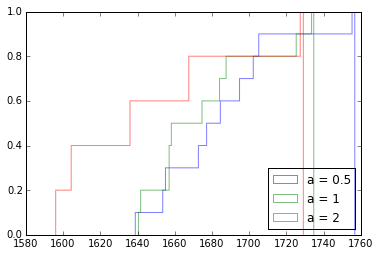

In [79]:
nice_histogram_many(DDD)

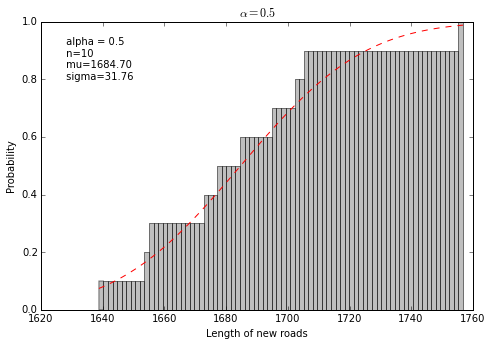

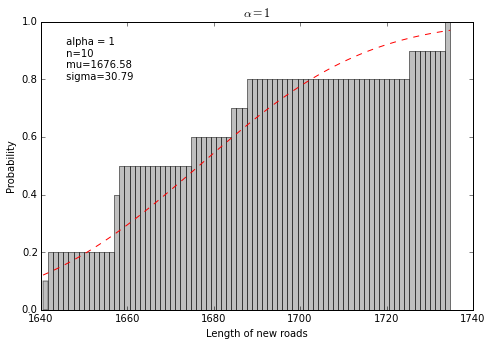

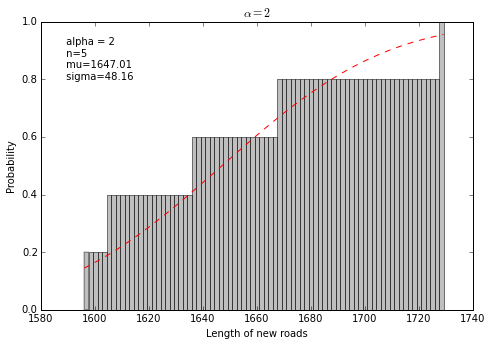

In [80]:
d = DDD

bounds = {key:(min(val),max(val)) for key,val in d.iteritems()}

for a in d.keys():
    x = np.array(d[a])
    bound = bounds[a]
    nice_histogram(a, x, bounds[a])

In [77]:
length = 150
apple = 100

if length > 300 or length in [50,100,150,200,225,250,275]:
    print "length is {}".format(length)
    

length is 150
